In [210]:
import pandas as pd
import numpy as np
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
%matplotlib inline # For showing plots
import os

In [140]:
df_selected= pd.read_csv('output\selected_companies.csv',encoding='cp1252')

df_selected

,company_name,web_site_adress,social_policy,enviroment_policy,Facebook_founded_date,Facebook_adress,Facebook_followers,Instagram_account,Instagram_followers,type_location_company,#countries_operate_company,web site languages,reference to the word sustainability,notes
0,NUNNER Logistics BV,https://www.nunner.com/,CORPORATE SOCIAL RESPONSIBILITY (CSR) https:/...,CORPORATE SOCIAL RESPONSIBILITY (CSR) .https:...,NaN,NaN,0,NO,0,international,11,12,NaN,Very informative site
1,Base Logistics BV,https://baselogistics.com/,nothing mentioned on their website,nothing mentioned on their website,04/10/12,https://www.facebook.com/BaseLogistics/,734,NO,0,international,3,2,no,NaN
2,De Graaf Logistics BV,https://www.degraaflogistics.nl/nl/,nothing mentioned on their website,https://www.degraaflogistics.nl/en/about_de_gr...,03/09/13,https://www.facebook.com/degraaflogistics/,1100,YES,252,international,3,2,NaN,the only thing they mention about the reletion...
3,Van Spreuwel Transport,https://vanspreuweltransport.nl/,nothing mentioned on their website,nothing mentioned on their website,25/12/11,https://www.facebook.com/spreuwel/,840,YES,269,local,1,1,no,NaN
4,GVT Transport & Logistics Tilburg,https://www.gvt.nl/,SUSTAINABLE DEVELOPMENT AT ID LOGISTICS FOCUS...,https://www.id-logistics.com/en/sustainable-de...,03/11/11,/https://www.facebook.com/gvttransportlogistics/,3200,YES,989,international,18,3,YES,GVT Transport & Logistics Tilburg are now unde...
5,Rhenus Contract Logistics Eindhoven B.V.,https://www.rhenus.group/,1.https://www.rhenus.group/rhenus-group/our-va...,https://www.rhenus.group/rhenus-group/corporat...,NaN,NaN,0,YES,1195,international,61,50,YES(https://www.rhenus.group/rhenus-group/sust...,Rhenus has more companies in the Netherlands (...
6,Van den Broek Logistics BV,https://www.broeklogistics.nl/,https://www.broeklogistics.nl/en/quality-and-csr/,https://www.broeklogistics.nl/en/quality-and-csr/,08/08/10,https://www.facebook.com/VandenBroekLogistics/,1700,YES,609,local,1,2,no,NaN
7,Transport J.A. van Wanrooy BV,https://www.freightned.com/nl/,nothing mentioned on their website,nothing mentioned on their website,29/08/13,https://www.facebook.com/wanrooytransport/abou...,756,NO,0,local,1,2,Sustainable and economical\r\nTransport of con...,"FreightNed is the new name of the company, in..."
8,Speedliner Logistics BV,http://www.speedliner.nl/,Maatschappelijk Verantwoord Ondernemen (MVO) i...,Maatschappelijk Bewust\r\nAls transportbedrijf...,03/03/11,https://www.facebook.com/speedlinerlogistics/,609,NO,0,local,1,1,no,NaN
9,Schavemaker Transport Breda B.V.,https://www.schavemaker.com/,nothing mentioned on their website,a few words about green energy and sustainabil...,22/06/16,https://www.facebook.com/schavemakerlogisticst...,883,NO,0,international,3,5,"YES /11times: ***By reducing truck movements,...",A Dutch company that expanded in England and P...


In [141]:
df_selected.columns


Index(['company_name', 'web_site_adress', 'social_policy', 'enviroment_policy',
       'Facebook_founded_date ', 'Facebook_adress', 'Facebook_followers',
       'Instagram_account', 'Instagram_followers', 'type_location_company',
       '#countries_operate_company', 'web site languages',
       'reference to the word sustainability', 'notes'],
      dtype='object')

In [142]:
df_selected.describe()

,Facebook_followers,Instagram_followers,#countries_operate_company,web site languages
count,20.000000,20.000000,20.000000,20.000000
mean,850.500000,242.900000,5.800000,5.250000
std,937.154961,352.309209,13.655922,10.799001
min,0.000000,0.000000,1.000000,1.000000
25%,116.250000,0.000000,1.000000,2.000000
50%,685.500000,63.000000,1.000000,2.000000
75%,1125.000000,308.000000,3.000000,3.250000
max,3200.000000,1195.000000,61.000000,50.000000


In [143]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_selected)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

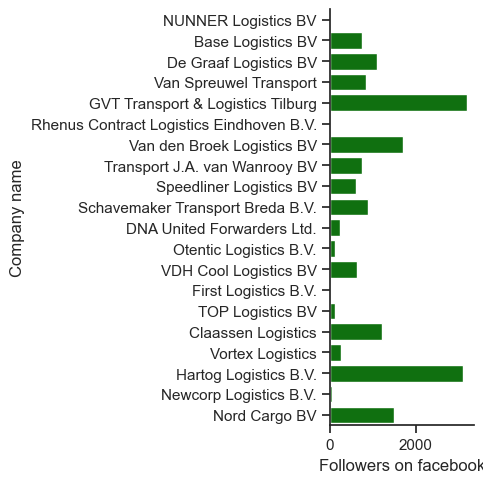

In [206]:

###ditstributon of followers

plt.suptitle("Title")
plot_1=sns.catplot(data=df_selected, x="Facebook_followers", y="company_name", kind="bar",color="green",).set_axis_labels(x_var='Followers on facebook',y_var='Company name')



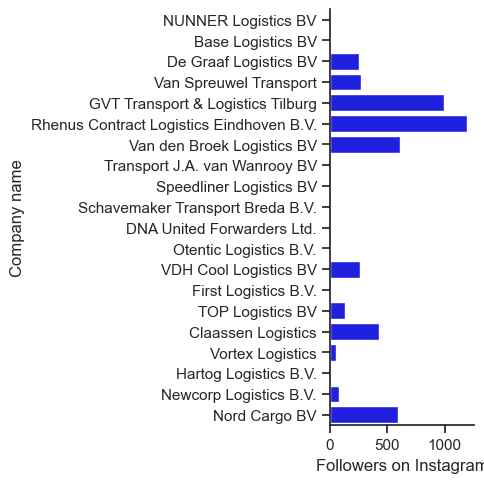

In [205]:
sns.catplot(data=df_selected, x="Instagram_followers", y="company_name", kind="bar",color="blue").set_axis_labels(x_var='Followers on Instagram',y_var='Company name',)


In [145]:
###pointing out which of the companies have a Facebook account.
df_selected['Facebook']=['no' if i==0 else 'yes' for i in df_selected['Facebook_followers']]


#the percentage of having an Facebook Instagram account
xF=(df_selected['Facebook'].value_counts())/20*100
yI=(df_selected['Instagram_account'].value_counts())/20*100
xF,yI

(yes    85.0
 no     15.0
 Name: Facebook, dtype: float64,
 YES    60.0
 NO     40.0
 Name: Instagram_account, dtype: float64)

In [146]:
df_selected['env_pol_exist']=['no' if i=='nothing mentioned on their website' else 'yes' for i in df_selected['enviroment_policy']]
df_selected['soc_pol_exist']=['no' if i=='nothing mentioned on their website' else 'yes' for i in df_selected['social_policy']]
df_selected

,company_name,web_site_adress,social_policy,enviroment_policy,Facebook_founded_date,Facebook_adress,Facebook_followers,Instagram_account,Instagram_followers,type_location_company,#countries_operate_company,web site languages,reference to the word sustainability,notes,Facebook,env_pol_exist,soc_pol_exist
0,NUNNER Logistics BV,https://www.nunner.com/,CORPORATE SOCIAL RESPONSIBILITY (CSR) https:/...,CORPORATE SOCIAL RESPONSIBILITY (CSR) .https:...,NaN,NaN,0,NO,0,international,11,12,NaN,Very informative site,no,yes,yes
1,Base Logistics BV,https://baselogistics.com/,nothing mentioned on their website,nothing mentioned on their website,04/10/12,https://www.facebook.com/BaseLogistics/,734,NO,0,international,3,2,no,NaN,yes,no,no
2,De Graaf Logistics BV,https://www.degraaflogistics.nl/nl/,nothing mentioned on their website,https://www.degraaflogistics.nl/en/about_de_gr...,03/09/13,https://www.facebook.com/degraaflogistics/,1100,YES,252,international,3,2,NaN,the only thing they mention about the reletion...,yes,yes,no
3,Van Spreuwel Transport,https://vanspreuweltransport.nl/,nothing mentioned on their website,nothing mentioned on their website,25/12/11,https://www.facebook.com/spreuwel/,840,YES,269,local,1,1,no,NaN,yes,no,no
4,GVT Transport & Logistics Tilburg,https://www.gvt.nl/,SUSTAINABLE DEVELOPMENT AT ID LOGISTICS FOCUS...,https://www.id-logistics.com/en/sustainable-de...,03/11/11,/https://www.facebook.com/gvttransportlogistics/,3200,YES,989,international,18,3,YES,GVT Transport & Logistics Tilburg are now unde...,yes,yes,yes
5,Rhenus Contract Logistics Eindhoven B.V.,https://www.rhenus.group/,1.https://www.rhenus.group/rhenus-group/our-va...,https://www.rhenus.group/rhenus-group/corporat...,NaN,NaN,0,YES,1195,international,61,50,YES(https://www.rhenus.group/rhenus-group/sust...,Rhenus has more companies in the Netherlands (...,no,yes,yes
6,Van den Broek Logistics BV,https://www.broeklogistics.nl/,https://www.broeklogistics.nl/en/quality-and-csr/,https://www.broeklogistics.nl/en/quality-and-csr/,08/08/10,https://www.facebook.com/VandenBroekLogistics/,1700,YES,609,local,1,2,no,NaN,yes,yes,yes
7,Transport J.A. van Wanrooy BV,https://www.freightned.com/nl/,nothing mentioned on their website,nothing mentioned on their website,29/08/13,https://www.facebook.com/wanrooytransport/abou...,756,NO,0,local,1,2,Sustainable and economical\r\nTransport of con...,"FreightNed is the new name of the company, in...",yes,no,no
8,Speedliner Logistics BV,http://www.speedliner.nl/,Maatschappelijk Verantwoord Ondernemen (MVO) i...,Maatschappelijk Bewust\r\nAls transportbedrijf...,03/03/11,https://www.facebook.com/speedlinerlogistics/,609,NO,0,local,1,1,no,NaN,yes,yes,yes
9,Schavemaker Transport Breda B.V.,https://www.schavemaker.com/,nothing mentioned on their website,a few words about green energy and sustainabil...,22/06/16,https://www.facebook.com/schavemakerlogisticst...,883,NO,0,international,3,5,"YES /11times: ***By reducing truck movements,...",A Dutch company that expanded in England and P...,yes,yes,no


In [147]:
#the percentage of having an environment or social policy
x=(df_selected['env_pol_exist'].value_counts())/20*100
y=(df_selected['soc_pol_exist'].value_counts())/20*100
x,y




(yes    55.0
 no     45.0
 Name: env_pol_exist, dtype: float64,
 no     65.0
 yes    35.0
 Name: soc_pol_exist, dtype: float64)

Text(0.5, 1.0, 'Instagram')

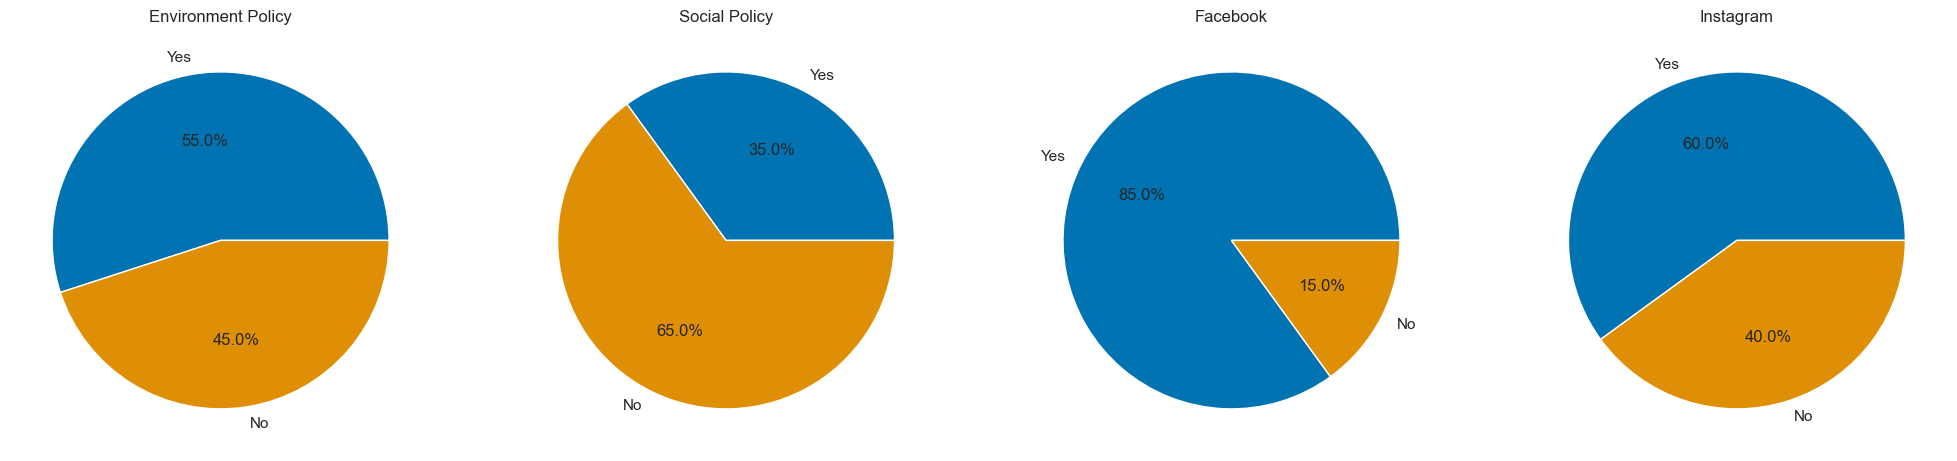

In [209]:
envi_policy = [55, 45]
Social_policy=[35, 65]
labels=['Yes', 'No']
Facebook =[85,15]
Instagram=[60,40]

#define Seaborn color palette to use
colors = sns.color_palette('colorblind')[0:5]

#create pie chart
fig, axs = plt.subplots(1, 4, figsize=(25, 25))
axs[0].pie(envi_policy,labels = labels, colors = colors, autopct = '%1.1f%%')
axs[0].set_title('Environment Policy')
axs[1].pie(Social_policy,labels = labels, colors = colors, autopct = '%1.1f%%')
axs[1].set_title('Social Policy')
axs[2].pie(Facebook,labels = labels, colors = colors, autopct = '%1.1f%%')
axs[2].set_title('Facebook')
axs[3].pie(Instagram,labels = labels, colors = colors, autopct = '%1.1f%%')
axs[3].set_title('Instagram')

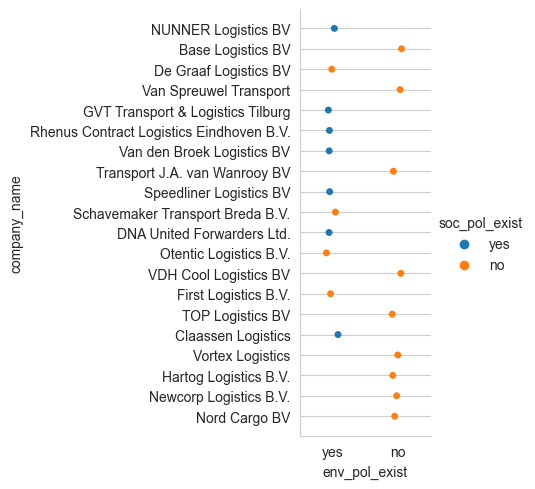

In [149]:
##ploting  "existence of social or environment policy for each company"
plt_policies=sns.catplot(data=df_selected, x="env_pol_exist", y="company_name",hue='soc_pol_exist')


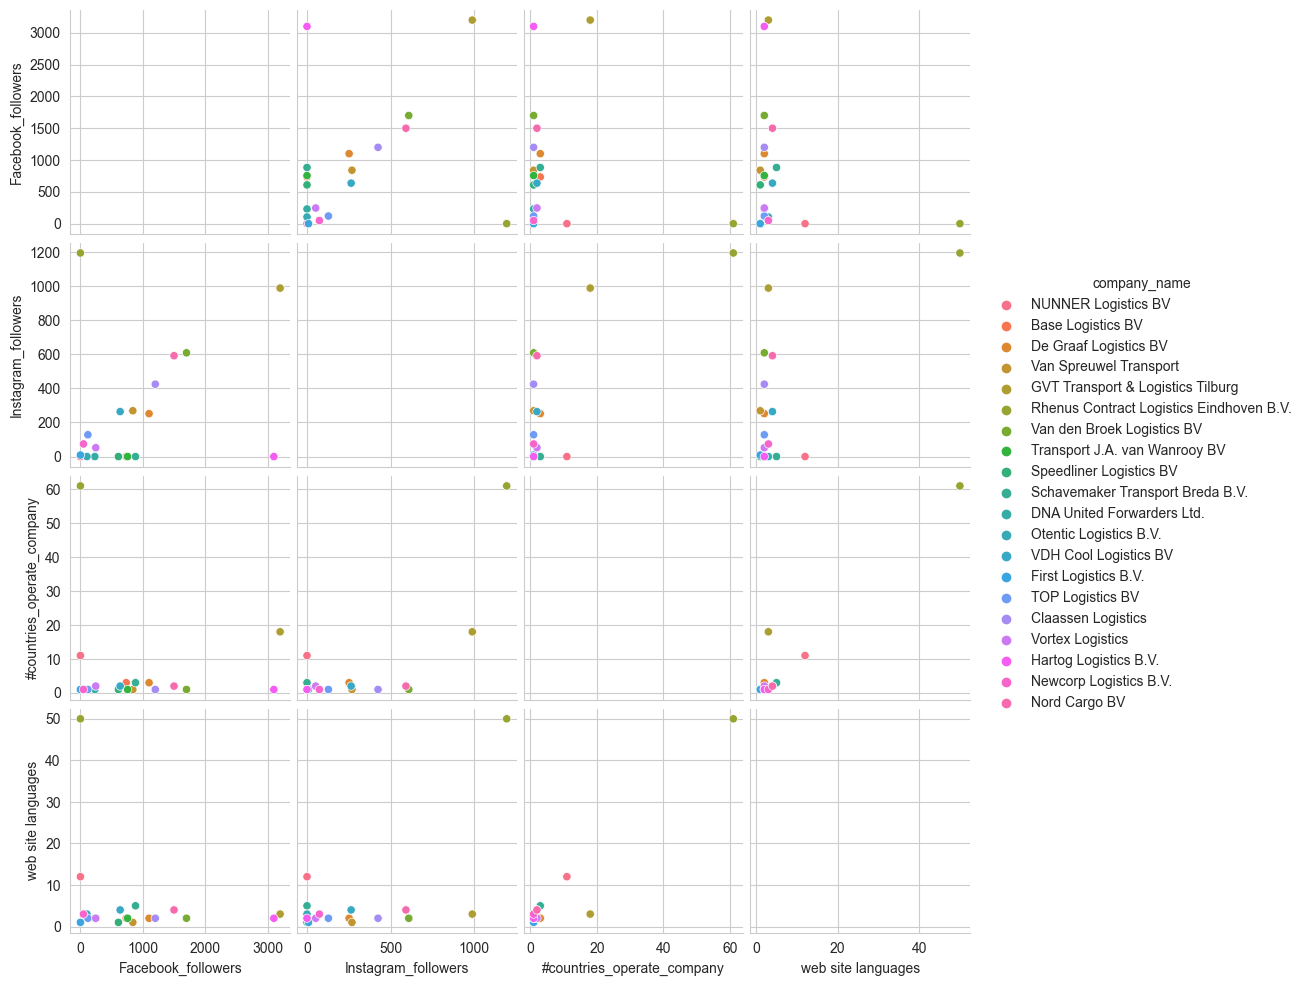

In [150]:
a=sns.pairplot(data=df_selected, hue='company_name',kind='scatter')
